<a href="https://colab.research.google.com/github/JoeyAviles89z/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/Define_ML_Assignment_JA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

In [0]:
import pandas as pd

In [3]:
#import the data
from google.colab import files
uploaded = files.upload()

Saving WWE Royal Rumble 1988-2017.xlsx to WWE Royal Rumble 1988-2017 (1).xlsx


In [4]:
df = pd.read_excel('WWE Royal Rumble 1988-2017.xlsx')
df.head()

,Year,Royal Rumble,Venue,City,State,Country,Attendance,Royal Rumble Match,Winner,Winner's Number,Last Elimination,Total Royal Rumble Wins,Number of Eliminations Made,Match Length
0,1988,Royal Rumble,Copps Coliseum,Hamilton,Ontario,Canada,18000,1st,Jim Duggan,13,One Man Gang,1,3,00:33:00
1,1989,Royal Rumble,The Summit,Houston,Texas,United States,19000,2nd,Big John Studd,27,Ted DiBiase,1,2,01:04:53
2,1990,Royal Rumble,Orlando Arena,Orlando,Florida,United States,18000,3rd,Hulk Hogan,25,Mr. Perfect,1,6,00:58:46
3,1991,Royal Rumble,Miami Arena,Miami,Florida,United States,16000,4th,Hulk Hogan,24,Earthquake,2,7,01:05:17
4,1992,Royal Rumble,Knickerbocker Arena,Albany,New York,United States,17000,5th,Ric Flair,3,Sid Justice,1,5,01:02:00


In [0]:
train = df.copy()

In [6]:
target = 'Attendance'
y_train = train[target]
y_train.value_counts(normalize=True)

16000    0.100000
18000    0.066667
17000    0.033333
15170    0.033333
17137    0.033333
17289    0.033333
17164    0.033333
15338    0.033333
18121    0.033333
19231    0.033333
14816    0.033333
15715    0.033333
14500    0.033333
15103    0.033333
20798    0.033333
60477    0.033333
16685    0.033333
18542    0.033333
9600     0.033333
15113    0.033333
10000    0.033333
52020    0.033333
19000    0.033333
16697    0.033333
13500    0.033333
12000    0.033333
16106    0.033333
Name: Attendance, dtype: float64

In [0]:
# Dropping features I'm not going to use to predict Attendence
df1 = train.drop(columns=['Year', 'Royal Rumble', 'Venue', 'City', 'State', 'Royal Rumble Match', "Winner's Number", 'Last Elimination', 'Total Royal Rumble Wins', 'Number of Eliminations Made']
                 )

In [8]:
#I will order the dataset from the Match Length
df1.sort_values(by='Match Length', ascending=False)

,Country,Attendance,Winner,Match Length
23,United States,15113,Alberto Del Rio,01:09:49
14,United States,16106,Triple H,01:09:22
5,United States,16000,Yokozuna,01:06:35
3,United States,16000,Hulk Hogan,01:05:17
1,United States,19000,Big John Studd,01:04:53
18,United States,16000,Rey Mysterio,01:02:12
29,United States,52020,Randy Orton,01:02:06
4,United States,17000,Ric Flair,01:02:00
13,United States,17137,Stone Cold Steve Austin,01:01:55
28,United States,15170,Triple H,01:01:42


In [9]:
# Check for nans
df1.isnull().sum()

Country         0
Attendance      0
Winner          0
Match Length    0
dtype: int64

In [0]:
# Attendance is the target
y = df1['Attendance']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


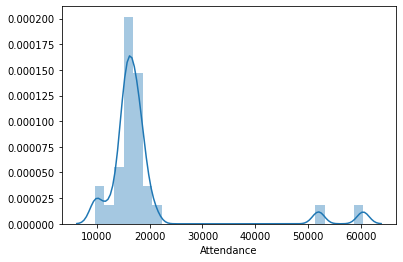

In [11]:
# Determine if its right-skewed
import seaborn as sns
sns.distplot(y);

In [12]:
y.describe()

count       30.000000
mean     18704.066667
std      10553.055223
min       9600.000000
25%      15127.250000
50%      16395.500000
75%      18000.000000
max      60477.000000
Name: Attendance, dtype: float64

Text(0.5, 1.0, 'Log-transformed target, in log-dollars')

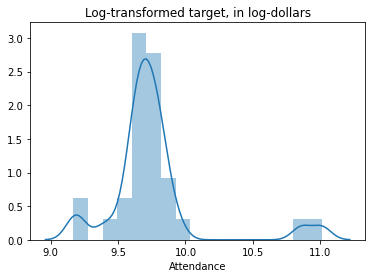

In [15]:
import matplotlib.pyplot as plt
y_log = np.log1p(y)
sns.distplot(y_log)
plt.title('Log-transformed target, in log-dollars')